# Introduction
## Learn to Aggregate and Merge Data in Pandas While Analyzing a Dataset of LEGO Pieces
Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

## What You Will Learn
- Combining Markdown and HTML markup in Jupyter Notebooks for effective documentation.
- Using Python list slicing on Pandas DataFrames for targeted data querying.
- Aggregating data with Pandas `.agg()` function for summary statistics.
- Creating scatter plots, bar charts, and dual-axis line plots with Matplotlib.
- Understanding relational database schemas based on primary and foreign keys.
- Merging DataFrames on shared keys to integrate data sources for comprehensive analysis.

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
color_df = pd.read_csv("./data/colors.csv")

In [3]:
color_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [4]:
color_df.shape

(135, 4)

In [5]:
# Number of unique colors
color_df.name.nunique()

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [6]:
color_df.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


#### Second way, we can use [.value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method.

In [7]:
color_df['is_trans'].value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

## Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png
<img src='https://i.imgur.com/aKcwkSx.png'> 

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 
<img src='https://i.imgur.com/whB1olq.png'>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.
### Find the Oldest and Largest LEGO Sets
**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [8]:
sets_df = pd.read_csv("data/sets.csv")

In [9]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [10]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [11]:
first_year_id = sets_df['year'].idxmin()
print("First year is: ", sets_df.year[first_year_id])
print("Name of sets is: ", sets_df.name[first_year_id])

First year is:  1949
Name of sets is:  Extra-Large Gift Set (ABB)


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [14]:
sets_df[sets_df.year == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [13]:
sets_df.sort_values('num_parts', ascending=False).head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [16]:
sets_df.groupby("year").count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


### Visualise the Number of Sets Published over Time

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [21]:
year_group = sets_df.groupby("year").count()
set_num = year_group['set_num']
year = year_group.index

In [22]:
year

Index([1949, 1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype='int64', name='year')

In [24]:
set_num.values

array([  5,   6,   4,  14,  28,  13,  20,  46,   4,   3,  22,  41,  20,
        18,  13, 111,  28,  39,  81,  37,  51,  39,  70,  39,  39,  76,
        99,  78,  92, 102,  84,  84,  73,  95, 168, 159, 233,  80, 134,
       108, 148, 135, 137, 164, 175, 198, 255, 381, 340, 367, 383, 504,
       441, 395, 351, 313, 315, 341, 421, 435, 503, 607, 605, 690, 774,
       757, 786, 816, 840, 674,   3])

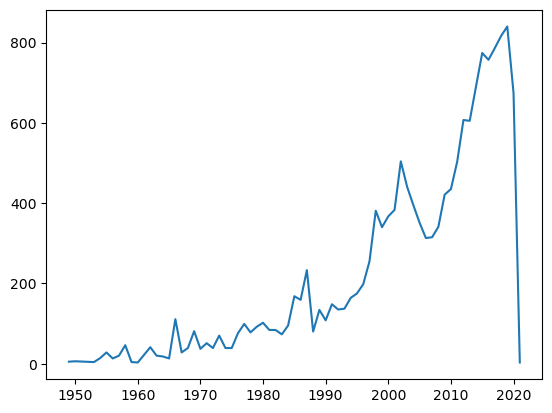

In [26]:
plt.plot(year, set_num.values)

If we don't exclude the last two years we get a dramatic drop at the end of the chart. This is quite misleading as it suggests LEGO is in big trouble! Given the dataset does not include a full calendar year for 2020, it's best to exclude the last two rows to get a better picture:

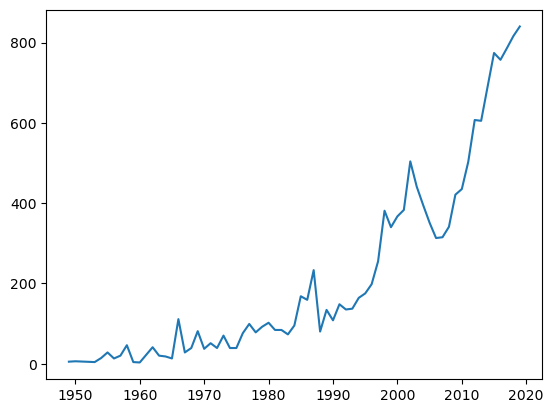

In [27]:
# Doing plot after removing last two year
plt.plot(year[:-2], set_num.values[:-2])

We also see that while the first 45 years or so, LEGO had some steady growth in its product offering, but it was really in the mid-1990s that the number of sets produced by the company increased dramatically! We also see a brief decline in the early 2000s and a strong recovery around 2005 in the chart.

### Using Pandas [.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) Function for Data Aggregation

Often when summarizing data, the `.groupby()` function is very useful. But when multiple aggregation operations are needed on specific columns, the `.agg()` method becomes essential.

In this project, we want to calculate the number of different LEGO themes released per calendar year. This involves grouping the data by year and counting the unique `theme_id` entries for each year.
We can achieve this by chaining `.groupby()` and `.agg()` like so:

#### 🧠 General Syntax

```python
.agg({'column_name': 'aggregation_function'})
```
- **`agg({...})`** → Applies one or more aggregation functions to selected columns.

---

#### ✅ Examples

| Goal | Code | Description |
|------|------|-------------|
| Count total sets per year | `.agg({'set_num': 'count'})` | Counts how many sets were released each year |
| Count unique themes per year | `.agg({'theme_id': 'nunique'})` | Measures theme diversity per year |
| Get average pieces per set per year | `.agg({'num_parts': 'mean'})` | Shows how complex sets were on average |
| Find max pieces in any set per year | `.agg({'num_parts': 'max'})` | Highlights the largest set released each year |

---

#### 🔄 Multiple Aggregations

You can also apply **multiple functions** to the same or different columns:

```python
.agg({
    'theme_id': 'nunique',
    'num_parts': ['mean', 'max']
})
```



In [44]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': 'nunique'})
themes_by_year.rename(columns={'theme_id': 'num_themes'}, inplace=True)
themes_by_year

,num_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


This gives us the number of unique LEGO themes per year. For example, LEGO started with only 2 themes in the early years. Over time, the number of themes grew considerably, much like the number of sets.

Next, **let's visualize this with a line plot.**

---

### Challenge

Create a line plot showing the number of themes released each year, including only the full calendar years from 1949 to 2019.


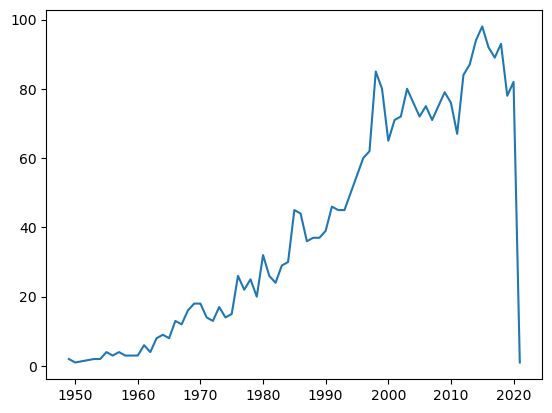

In [45]:
plt.plot(themes_by_year.index, themes_by_year['num_themes'].values)

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

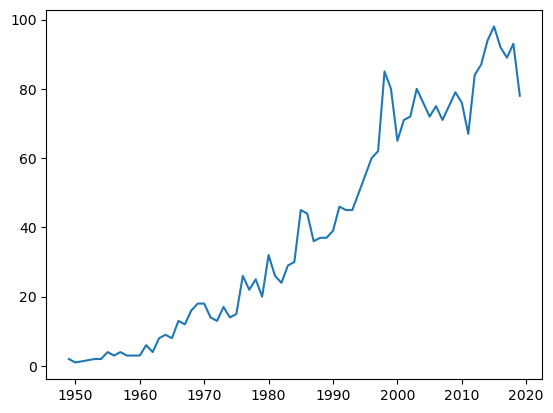

In [46]:
plt.plot(themes_by_year.index[:-2], themes_by_year['num_themes'].values[:-2])
plt.show()

### Line Charts with Two Seperate Axes (Superimposing Line Charts with Separate Axes)
Often, it is helpful to visualize related trends on the same time axis, even if their numeric scales are quite different. For example, plotting the number of LEGO themes and the number of LEGO sets by year helps compare their growth over time.

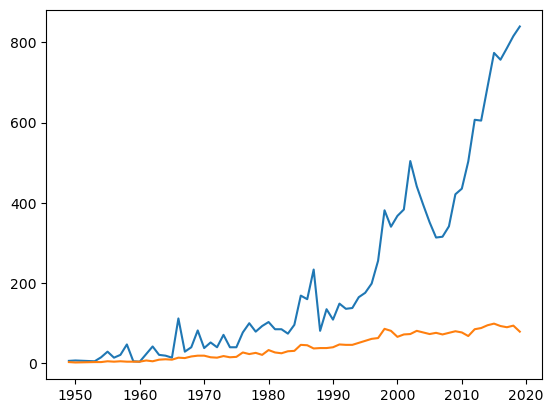

In [47]:
plt.plot(year[:-2], set_num.values[:-2])
plt.plot(themes_by_year.index[:-2], themes_by_year['num_themes'].values[:-2])
plt.show()

If you plot both data series on the same axis, the one with the larger range (e.g., number of sets) will overwhelm the other (number of themes). 

To address this, you can use two separate y-axes in Matplotlib, sharing the same x-axis.

Below is an example of how to create two axes using Matplotlib:
```python
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 
```
We then create another axis object: ax2. The key thing is that by using the `.twinx()` method allows ax1 and ax2 to share the same x-axis. When we plot our data on the axes objects we get this:

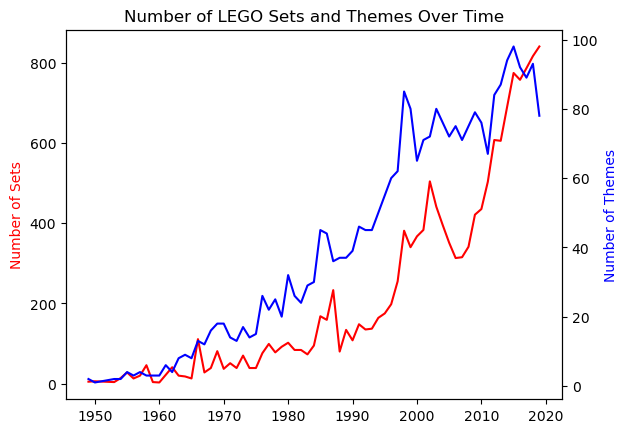

In [51]:
ax1 = plt.gca()
ax2 = plt.twinx()

# Plot number of sets
ax1.plot(year[:-2], set_num.values[:-2], color='red')
# Create a second y-axis on the right, sharing the same x-axis
ax2.plot(themes_by_year.index[:-2], themes_by_year['num_themes'].values[:-2], color='blue')

ax1.set_ylabel('Number of Sets', color='red')
ax2.set_ylabel('Number of Themes', color='blue')
plt.title('Number of LEGO Sets and Themes Over Time')
plt.show()


### Scatter Plots: Average Number of Parts per LEGO Set
**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [52]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [54]:
# year as the index and contains the average number of parts per LEGO set in that year
parts_per_set = sets_df.groupby('year').agg({'num_parts': 'mean'})
parts_per_set.rename(columns={'num_parts': 'avg_parts'}, inplace=True)
parts_per_set.head()

,avg_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

- let's create a scatter plot. A scatter plot simply uses dots to represent the values of each data point.

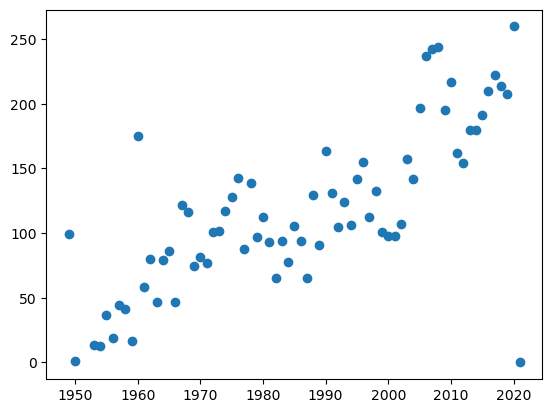

In [56]:
plt.scatter(parts_per_set.index, parts_per_set['avg_parts'].values)
plt.show()

From the chart, we can definitely make out an upward trend in the size and complexity of the LEGO sets based on the average number of parts. In the 2010s the average set contained around 200 individual pieces, which is roughly double what average LEGO set used to contain in the 1960s.

---

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [60]:
sets_df['theme_id'].value_counts()[:5]

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

**We have no idea what our themes are actually called! 🤨 Ok, we can see that the theme with id 158 is the largest theme containing 753 individual sets, but what's that theme called? This is not very helpful. We need to find the names of the themes based on the theme_id from the themes.csv file.**

---

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png
<img src="https://i.imgur.com/Sg4lcjx.png" >

### Database Schemas, Foreign Keys and Merging DataFrames (Working with a Relational Database)

What is a database schema? A schema is just how the database is organised. Many relational databases, such as our LEGO data, is split into individual tables. We have separate tables for the colours, the sets and the thems. With a relational database, the tables are linked to each other through their keys.


#### Understand the theme.csv file

The themes.csv file has the actual theme names. How is this table linked to the others tables? Well, the sets .csv has `theme_id`s which match the id column in the themes.csv.

This means that the <code>theme_ids</code> is the foreign key inside the sets.csv. Many different sets can be part of the same theme. But inside the themes.csv, each theme_id, which is just called `id` is unique. This uniqueness makes the id column the primary key inside the `themes.csv`.  **Explore the themes.csv. How is it structured?**

In [61]:
themes = pd.read_csv('./data/themes.csv')

In [62]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [65]:
themes.shape

(596, 3)

**Challenge**: Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [66]:
themes[themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [68]:
sets_df[sets_df['theme_id'] == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


Star Wars is a really long-running franchise. Theme number 18 was running from 2000 to 2002 and seems to be comprised of several of the show's characters. 

What about, say theme 209?

In [69]:
sets_df[sets_df['theme_id'] == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging (i.e., Combining) DataFrames based on a Key (How to Merge DataFrames and Create Bar Charts)

Often, analysis requires combining data from multiple sources. In our case, we want to merge our data on theme names with the number of sets per theme.\
The Pandas [.merge() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) allows us to combine two DataFrames based on a common column

- in this example, the `"id"` column.

First, ensure your theme IDs and set counts are together in a DataFrame:

In [71]:
set_theme_count = sets_df['theme_id'].value_counts()
set_theme_count

theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
156      1
519      1
530      1
475      1
414      1
Name: count, Length: 571, dtype: int64

In [72]:
set_theme_count_df = pd.DataFrame({
    'id': set_theme_count.index,
    'set_count': set_theme_count.values
})

In [73]:
set_theme_count_df.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [74]:
# Now, merge this DataFrame with your `themes` DataFrame:
merged_df = pd.merge(set_theme_count_df, themes, on='id')

In [75]:
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


Now the merged DataFrame will contain both theme names and set counts for each theme.

---

#### Creating a Bar Chart

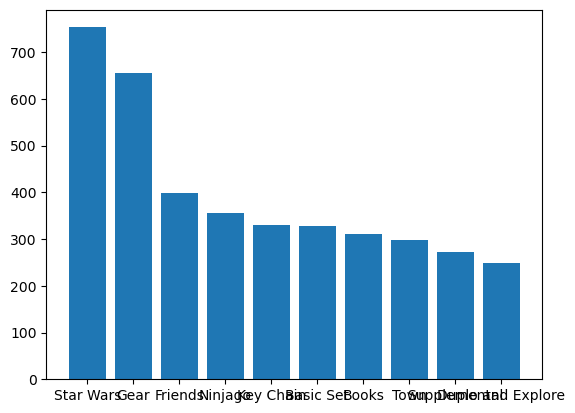

In [77]:
plt.bar(merged_df.name[:10], merged_df.set_count[:10])
plt.show()

**That worked, but it's almost unreadable. 😩**\
To visualize the top 10 themes by set count, you can use Matplotlib's `.bar()` method. For improved readability, increase the figure size, add axis labels, and rotate the x-axis labels.

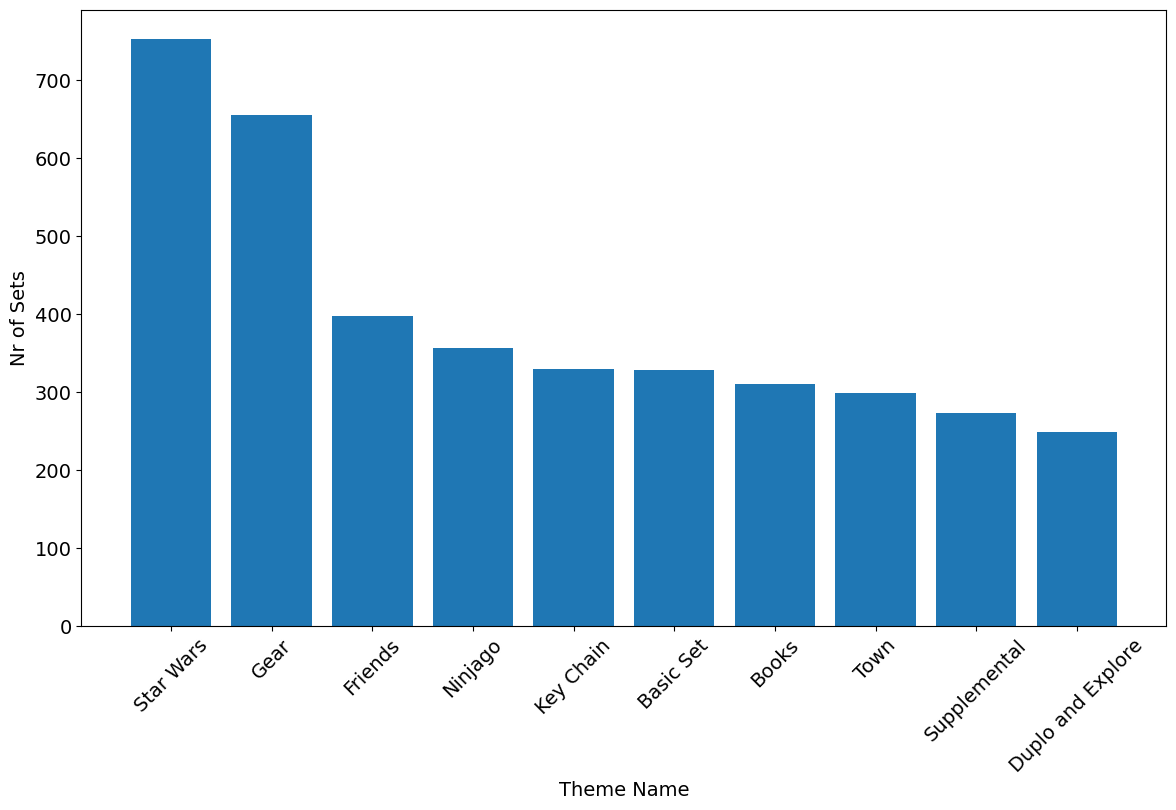

In [76]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])
plt.show()

With this chart, it's clear which themes have the most LEGO sets. Some, like Star Wars and Ninjago, stand out, but themes like 'Gear' and 'Books' show how the LEGO product line has diversified over the years!